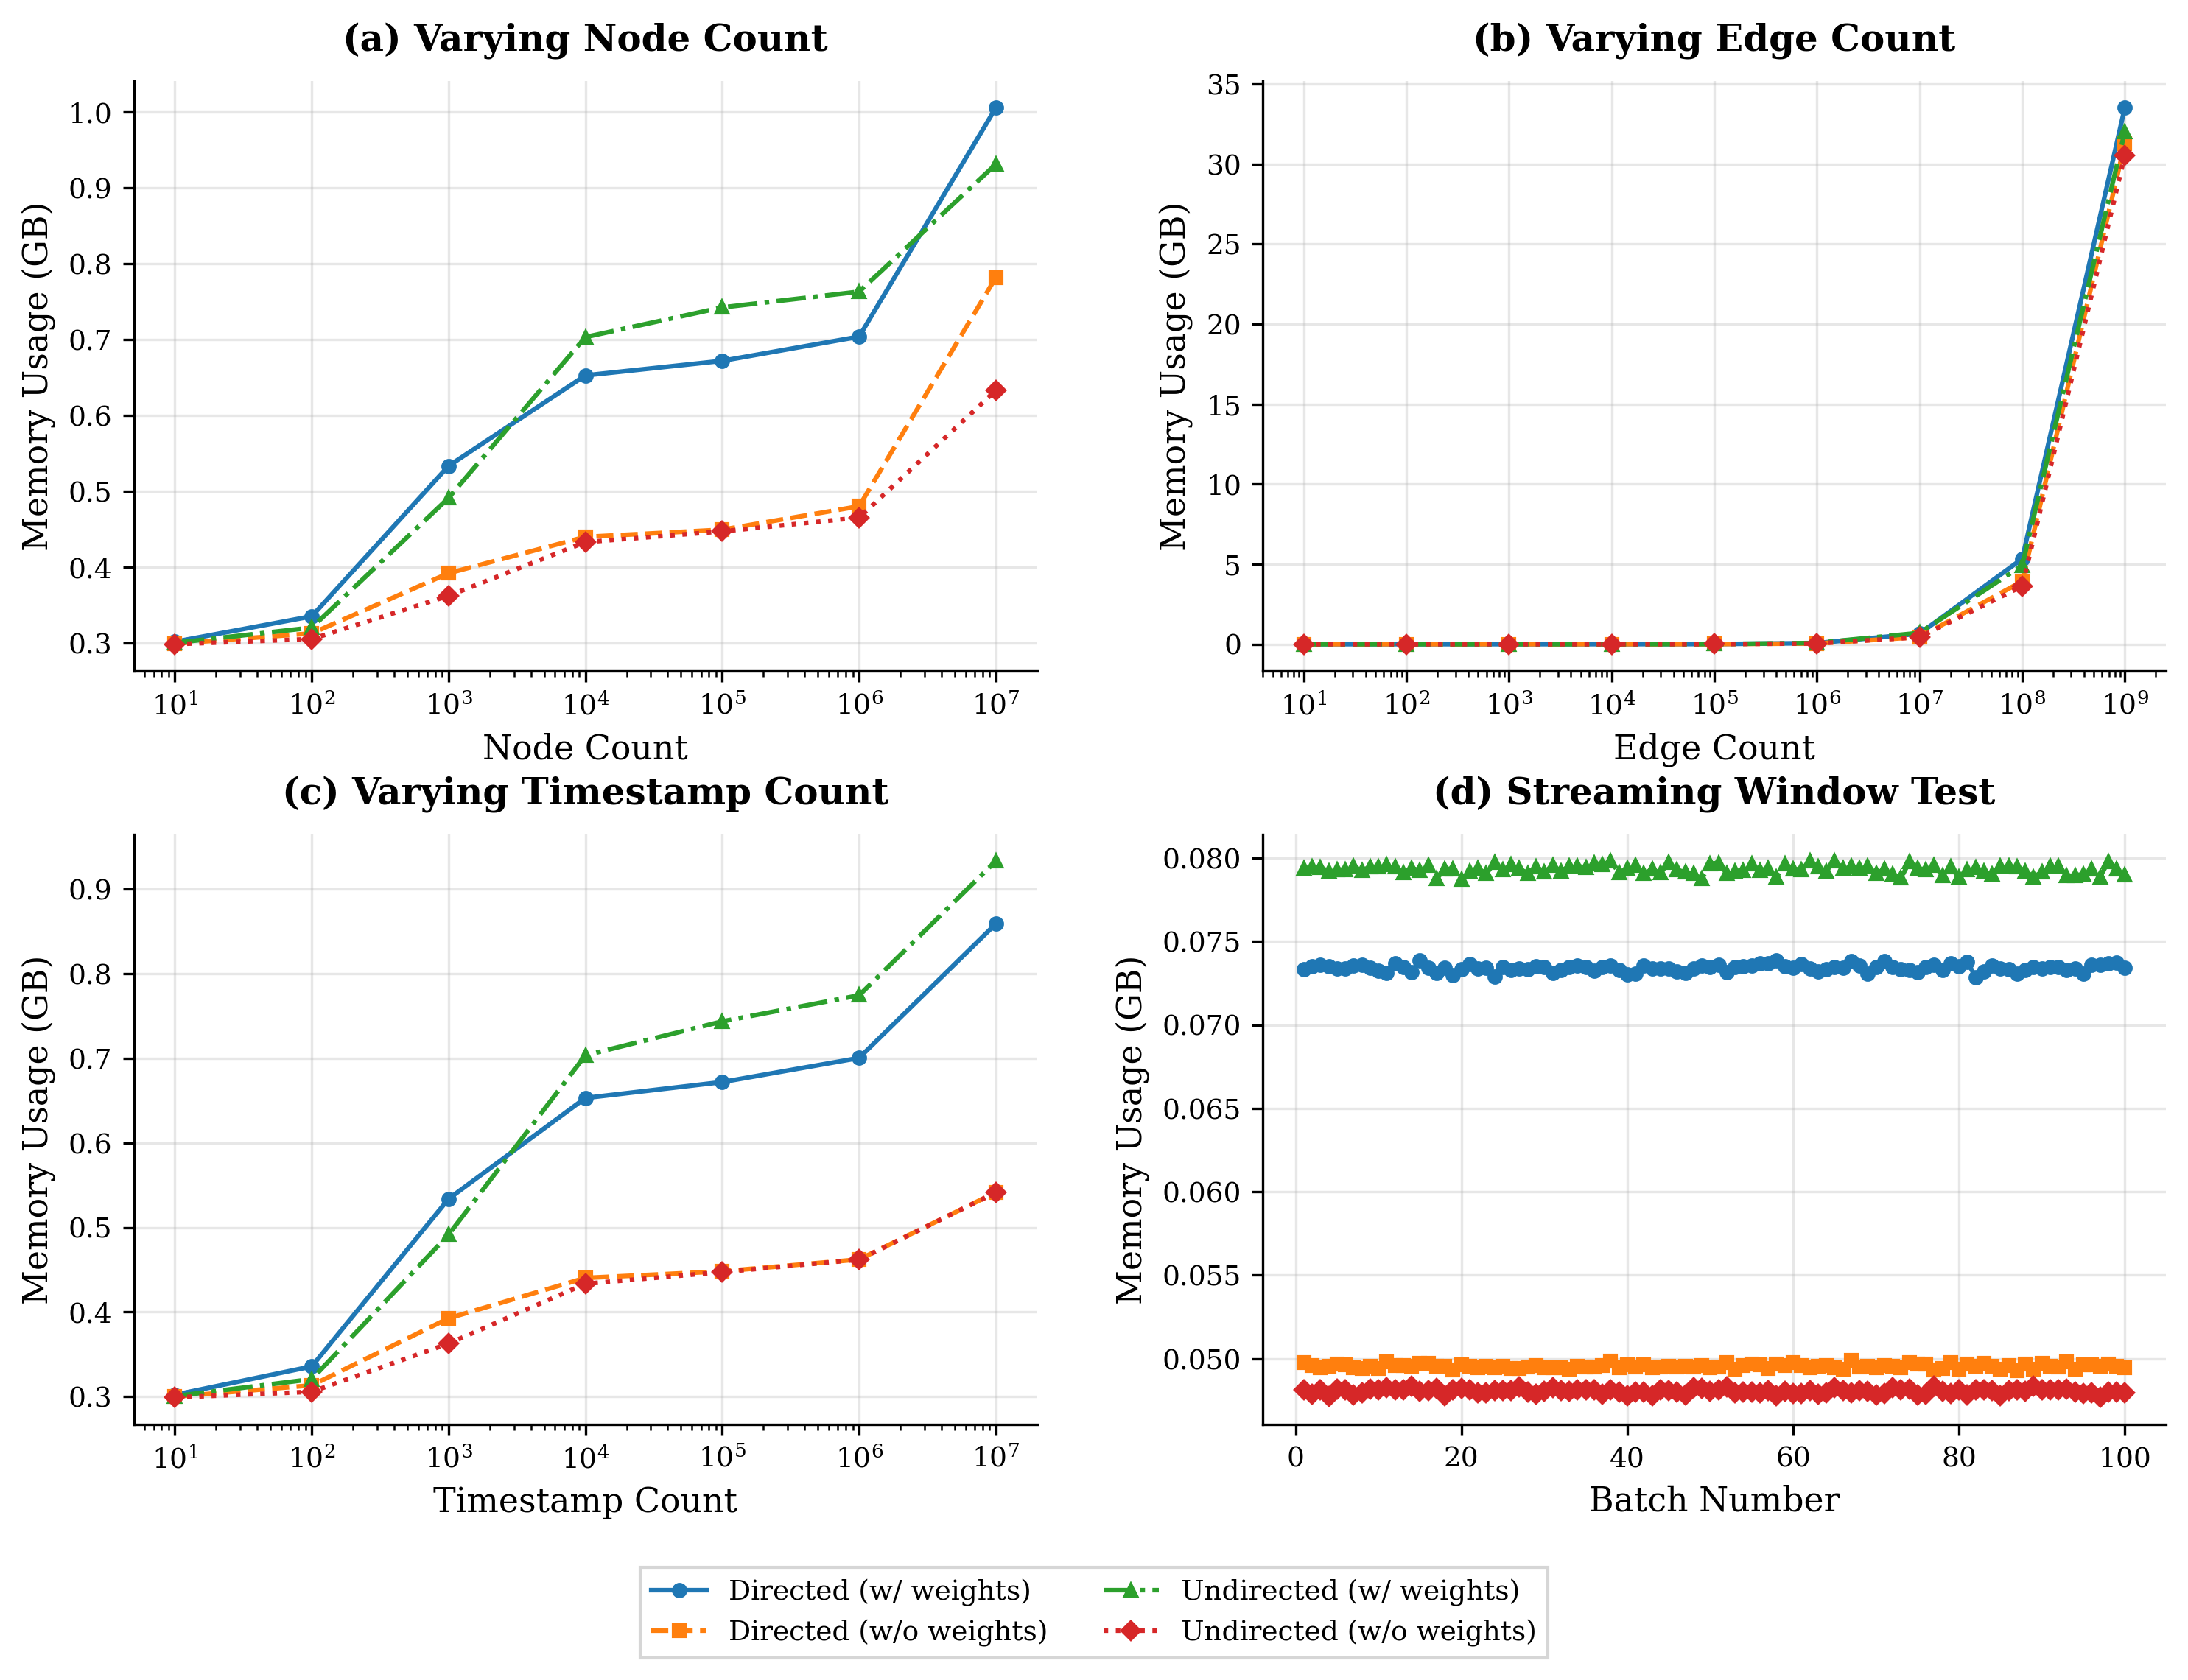

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load results
with open('results/memory_benchmarking.pickle', 'rb') as f:
    results = pickle.load(f)

# Configure fonts and style for academic paper - matching other plots
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Create 2x2 subplot with academic sizing
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Increased height for better proportion

# Professional color scheme and markers
configs = ['directed_with_weights', 'directed_without_weights',
          'undirected_with_weights', 'undirected_without_weights']
config_labels = ['Directed (w/ weights)', 'Directed (w/o weights)',
                'Undirected (w/ weights)', 'Undirected (w/o weights)']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D']
linestyles = ['-', '--', '-.', ':']

# Plot 1: Increasing Nodes
ax = axes[0, 0]
for idx, (config, color, marker, linestyle) in enumerate(zip(configs, colors, markers, linestyles)):
    if f"increasing_nodes_{config}" in results:
        data = results[f"increasing_nodes_{config}"]
        nodes = list(data.keys())
        memory = [x / 1024 for x in data.values()]
        ax.semilogx(nodes, memory, marker=marker, color=color, linestyle=linestyle,
                   label=config_labels[idx], markersize=4, linewidth=1.5)

ax.set_title('(a) Varying Node Count', fontweight='bold', pad=10)
ax.set_xlabel('Node Count')
ax.set_ylabel('Memory Usage (GB)')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.ticklabel_format(style='plain', axis='y')

# Plot 2: Increasing Edges
ax = axes[0, 1]
for idx, (config, color, marker, linestyle) in enumerate(zip(configs, colors, markers, linestyles)):
    if f"increasing_edges_{config}" in results:
        data = results[f"increasing_edges_{config}"]
        edges = list(data.keys())
        memory = [x / 1024 for x in data.values()]
        ax.semilogx(edges, memory, marker=marker, color=color, linestyle=linestyle,
                   markersize=4, linewidth=1.5)

ax.set_title('(b) Varying Edge Count', fontweight='bold', pad=10)
ax.set_xlabel('Edge Count')
ax.set_ylabel('Memory Usage (GB)')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.ticklabel_format(style='plain', axis='y')

# Plot 3: Increasing Timestamps
ax = axes[1, 0]
for idx, (config, color, marker, linestyle) in enumerate(zip(configs, colors, markers, linestyles)):
    if f"increasing_timestamps_{config}" in results:
        data = results[f"increasing_timestamps_{config}"]
        timestamps = list(data.keys())
        memory = [x / 1024 for x in data.values()]
        ax.semilogx(timestamps, memory, marker=marker, color=color, linestyle=linestyle,
                   markersize=4, linewidth=1.5)

ax.set_title('(c) Varying Timestamp Count', fontweight='bold', pad=10)
ax.set_xlabel('Timestamp Count')
ax.set_ylabel('Memory Usage (GB)')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.ticklabel_format(style='plain', axis='y')

# Plot 4: Streaming Window
ax = axes[1, 1]
for idx, (config, color, marker, linestyle) in enumerate(zip(configs, colors, markers, linestyles)):
    if f"streaming_window_{config}" in results:
        data = results[f"streaming_window_{config}"]
        batches = range(1, len(data) + 1)
        memory_gb = [x / 1024 for x in data]
        ax.plot(batches, memory_gb, marker=marker, color=color, linestyle=linestyle,
               markersize=4, linewidth=1.5)

ax.set_title('(d) Streaming Window Test', fontweight='bold', pad=10)
ax.set_xlabel('Batch Number')
ax.set_ylabel('Memory Usage (GB)')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.ticklabel_format(style='plain', axis='y')

# Add a single legend at the bottom for all subplots
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.02),  # Adjusted to -0.02 for better spacing
          ncol=2,  # Two columns to save space
          frameon=True,
          fancybox=False,
          fontsize=9)

# Adjust layout with space for bottom legend - matching other plots
plt.tight_layout()
plt.subplots_adjust(wspace=0.25, top=0.88, bottom=0.12)  # Adjusted to 0.12 for proper spacing

# Save as high-quality formats
plt.savefig('plots/memory_benchmarking.pdf', format='pdf', bbox_inches='tight')
plt.savefig('plots/memory_benchmarking.png', format='png', bbox_inches='tight')
plt.show()

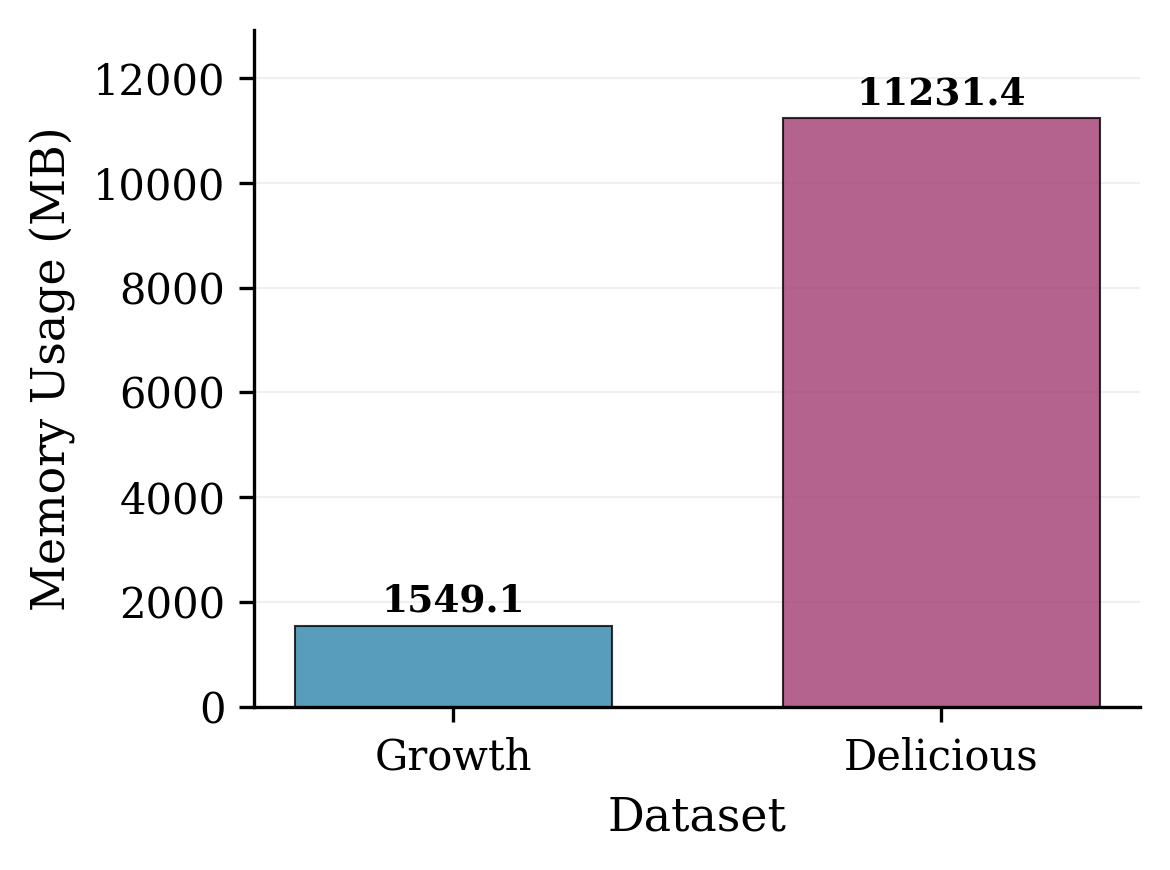

In [10]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load TEA dataset results
with open('results/memory_benchmarking_tea_datasets.pickle', 'rb') as f:
    tea_results = pickle.load(f)

# Configure fonts and style for academic paper
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Create single subplot with academic sizing
fig, ax = plt.subplots(figsize=(4, 3))  # Compact size for paper

datasets = list(tea_results.keys())
memory_usage = list(tea_results.values())

# Capitalize dataset names for display
dataset_labels = [name.capitalize() for name in datasets]

# Academic color scheme - professional and accessible
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'][:len(datasets)]

# Create bars with professional styling
bars = ax.bar(dataset_labels, memory_usage,
              color=colors,
              width=0.65,
              edgecolor='black',
              linewidth=0.5,
              alpha=0.8)

# Add value labels on top of bars with better formatting
for bar, value in zip(bars, memory_usage):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + max(memory_usage)*0.01,
            f'{value:.1f}',
            ha='center', va='bottom',
            fontsize=9,
            fontweight='bold')

# Clean axes and labels
ax.set_ylabel('Memory Usage (MB)')
ax.set_xlabel('Dataset')

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Subtle grid
ax.grid(axis='y', alpha=0.2, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Set y-axis to start from 0 and add small margin at top
ax.set_ylim(0, max(memory_usage) * 1.15)

# Rotate x-axis labels if needed (uncomment if dataset names are long)
# plt.xticks(rotation=45, ha='right')

# Tight layout for paper
plt.tight_layout()

# Save as high-quality formats
plt.savefig('plots/memory_usage_tea_datasets.pdf', format='pdf', bbox_inches='tight')
plt.savefig('plots/memory_usage_tea_datasets.png', format='png', bbox_inches='tight')
plt.show()